# Linear Regression

In [192]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 20

In [193]:
X = np.arange(-2.5, 2.5, 0.5)
X

array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

Every straight line can be represented by an equation: y = mx + b. The coordinates of every point on the line will solve the equation if you substitute them in the equation for x and y.
The slope m of this line - its steepness, or slant.
The equation of any straight line, called a linear equation, can be written as: y = mx + b, where m is the slope of the line and b is the y-intercept.
The y-intercept of this line is the value of y at the point where the line crosses the y axis.

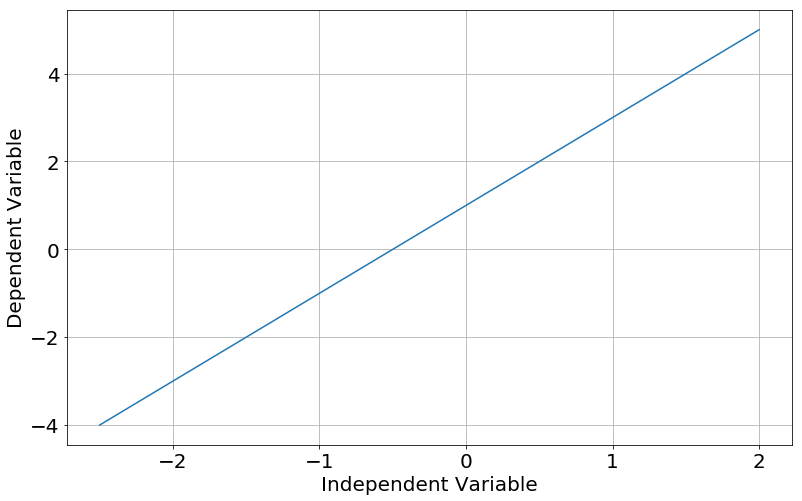

In [194]:
m = 2
b = 1
Y = m * X + b
plt.plot(X, Y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.grid(True)
plt.show()

### Generate random set of data points

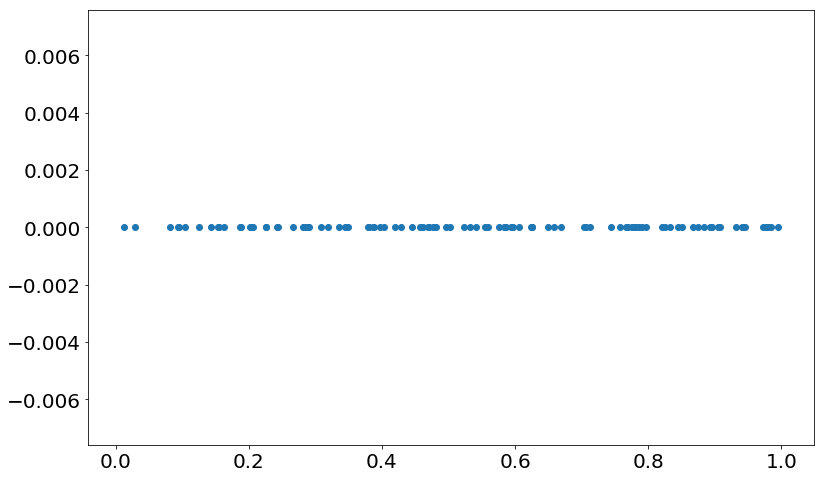

In [195]:
x_data = np.random.rand(100).astype(np.float32)
plt.scatter(x_data, [0 for _ in range(100)])
plt.show()

### The equation for the model is: Y = 3X + 2

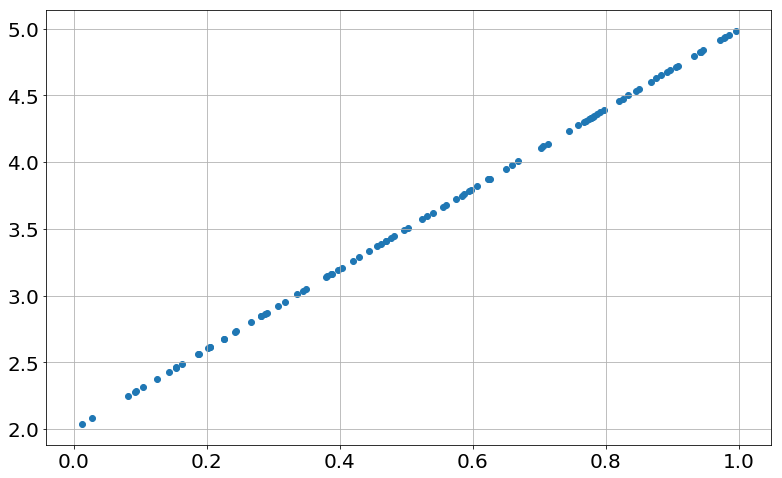

In [196]:
y_data = 3 * x_data + 2
plt.scatter(x_data, y_data)
plt.grid(True)
plt.show()

**Shift all of the points with a scale of 0.2 to the original y values.**

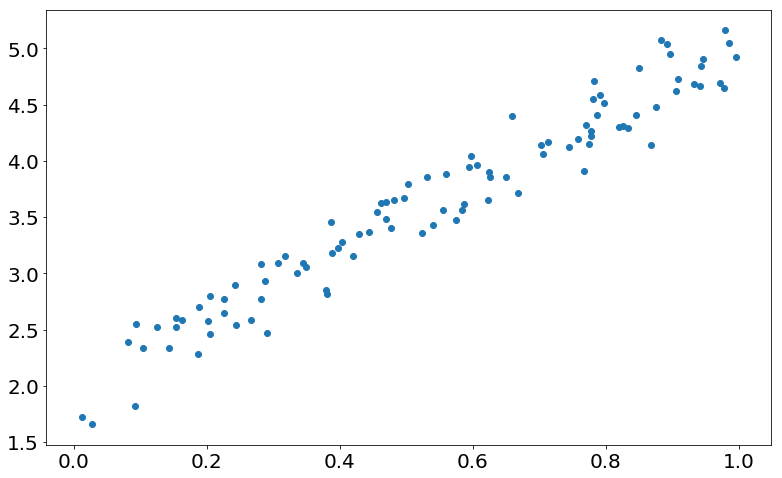

In [197]:
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.2))(y_data)
plt.scatter(x_data, y_data)
plt.show()

This is the data set that we will use for finding the regression line. Now we will initialize the variables a and b.

In [198]:
m = tf.Variable(1.0)
b = tf.Variable(0.2)
y = tf.multiply(m, x_data) + b

Find Loss's value by using tf.reduce_mean(). This function finds the mean of a multidimantional tensor.

In [199]:
loss = tf.reduce_mean(tf.square(y - y_data))

Simple gradient descent with a learning rate of 0.5. We will define the training method of the graph.  
.minimize() will minimize the error function of the optimizer, resulting a better model.

In [200]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Initializing  the variables.

In [201]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

Start the optimization and run the graph.

In [202]:
train_data = []
for step in range(100):
    slope_and_intercept = session.run([train, m, b])[1:]
    if step % 5 == 0:
        print("Step: {} {}".format(step, slope_and_intercept))
        train_data.append(slope_and_intercept)

Step: 0 [1.0, 0.2]
Step: 5 [2.4692264, 2.314451]
Step: 10 [2.6068358, 2.226619]
Step: 15 [2.7118547, 2.166251]
Step: 20 [2.7898548, 2.1213949]
Step: 25 [2.8477933, 2.0880759]
Step: 30 [2.89083, 2.0633264]
Step: 35 [2.922798, 2.0449426]
Step: 40 [2.9465435, 2.0312872]
Step: 45 [2.9641817, 2.0211437]
Step: 50 [2.9772835, 2.0136094]
Step: 55 [2.9870152, 2.0080128]
Step: 60 [2.9942443, 2.0038555]
Step: 65 [2.999614, 2.0007675]
Step: 70 [3.0036025, 1.9984739]
Step: 75 [3.006565, 1.9967701]
Step: 80 [3.0087657, 1.9955046]
Step: 85 [3.0104003, 1.9945647]
Step: 90 [3.0116143, 1.9938664]
Step: 95 [3.0125163, 1.9933478]


In [ ]:
color_red, color_green, color_blue = 1.0, 1.0, 0.0  # The RGB values.
for slope_and_intercept in train_data:
    color_blue += 1.0 / len(train_data)
    color_green -= 1.0 / len(train_data)
    if color_blue > 1.0:
        color_blue = 1.0
    if color_green < 0.0:
        color_green = 0.0
    m, b = slope_and_intercept
    regression_line_y = np.vectorize(lambda x: m * x + b)(x_data)
    line = plt.plot(x_data, regression_line_y)
    plt.setp(line, color=(color_red, color_green, color_blue))
    
plt.plot(x_data, y_data, "ro")
plt.show()